# OPGAVE 1 Intro

L01/intro.ipynb: Qa+b+c+d

L01/modules_and_classes.ipynb: Qa+b+c+e+f+g

L02/cost_function.ipynb: Qa+b+c+d+e+f

L02/dummy_classifier.ipynb: Qa+b+c+d

L02/performance_metrics.ipynb: Qa+b+c+d+e

### Setup code

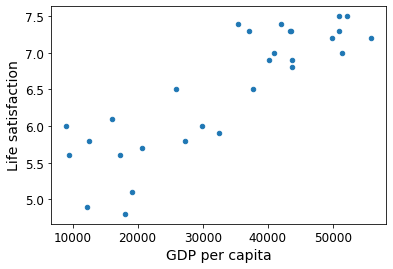

[[5.96242338]]
[[4.91154459e-05]]
[4.8530528]
OK


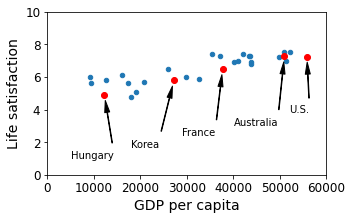

In [ ]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("IGNORING: Saving figure", fig_id) # SWMAL: I've disabled saving of figures
    #if tight_layout:
    #    plt.tight_layout()
    #plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

import os
datapath = os.path.join("../datasets", "lifesat", "")


# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
try:
    oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
    gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
except Exception as e:
    print(f"SWMAL NOTE: well, you need to have the 'datasets' dir in path, please unzip 'datasets.zip' and make sure that its included in the datapath='{datapath}' setting in the cell above..")
    raise e

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]


oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli.head(2)

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')


from sklearn import linear_model
QaModel = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
QaModel.fit(Xsample, ysample)

print(QaModel.coef_)
print(QaModel.intercept_)

t0 = 4.8530528 #b
t1 = 4.91154459e-05 #a



print("OK")

## Qa -The $\theta$ parameters and the $R^2$ Score

First we need to fit the model to our data using .fit from the sklearn.linear_model library.\
To extract $\theta_0$ and $\theta_1$, all you need to do is using .coef_ and .intercept_ on our fitted model.\
We can now try to predict the expected lifesatisfaction for Cyprus using .predict\
The R-value/score can be extracted using .score

In [ ]:
QaModel = linear_model.LinearRegression()
QaModel.fit(Xsample,ysample)

#intercept - Theta 0
print("Theta0: " + str(QaModel.intercept_))

#coefficient - Theta 1
print("Theta1: " + str(QaModel.coef_))

Theta0: [4.8530528]
Theta1: [[4.91154459e-05]]


In [ ]:
#Trying to predict the lifesatisfaction for Cyprus: 

Xnew = [[22587]]
print("Predicted lifesatisfaction for Cyprus: " + str(QaModel.predict(Xnew)))

#score - R værdi
print("Score: " + str(QaModel.score(Xsample, ysample)))

Predicted lifesatisfaction for Cyprus: [[5.96242338]]
Score: 0.734441435543703


#### Questions answered

The $R^2$ value is a calculated value, which tells us how good the linear regression can predict the y value to X.\

The $R^2$ is typically between 0-1, however it can be negative value if the wrong model was chosen, or if wrong constraints were applied by mistake.\
    
Its is best to have a high score, which implies that the regression line fits the data relatively well.

## Qb - Using k-Nearest Neighbors

Here we try to change the linear regression model to a `sklearn.neighbors.KNeighborsRegressor` with a k-value of 3. We will now try to rerun the same experiment as when we used the linear regression model and compare the results.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

#We create a KNeighborsRegressor with k=3
k=3
QbModel3 = KNeighborsRegressor(n_neighbors=k)

#We fit the data to the new model and predicts the lifesatisfaction for Cyprus using its GDP per capita
QbModel3.fit(Xsample, ysample)
print("Predicted lifesatisfaction for Cyprus: " + str(QbModel3.predict(Xnew)))

print("Score: " + str(QbModel3.score(Xsample, ysample)))

Predicted lifesatisfaction for Cyprus: [[5.76666667]]
Score: 0.8525732853499179


#### Questions answered
The k-nearest neighbors estimate for Cyprus is 5.77 which is lower than the linear regression 5.96 prediction.

The score method is exactly the same as when using the linear regression model. The input values are different and thats all.

Linear Regressor
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

k-nearest neighbor regressor
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html?highlight=neighbors#sklearn.neighbors.KNeighborsRegressor.score

It uses the same scoring method as stated: "The R2 score used when calling score on a regressor usesmultioutput='uniform_average' from version 0.23"

## Qc - Tuning Parameter for k-Nearest Neighbors and A Sanity Check

Now we will try to produce some extra KNN-models with different K-values, so we can compare what the effect this has on the model. We will try to plot these models in the same graph and use this to decide whether or not the model is fitting the data.

Score using K=1: 1.0


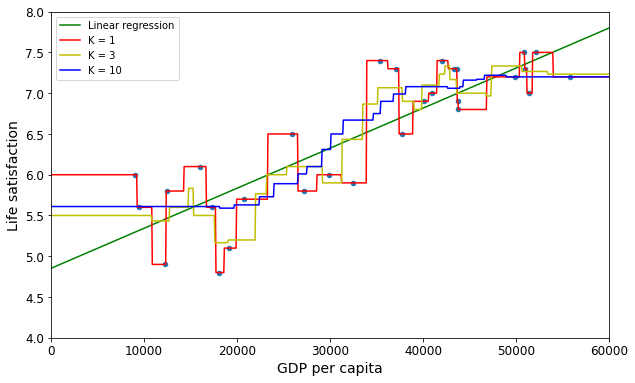

In [ ]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(10,6))
plt.axis([0, 60000, 4, 8])

# create an test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size of your choice
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

# Trying different k values:
QbModel1 = KNeighborsRegressor(n_neighbors=1)
QbModel10 = KNeighborsRegressor(n_neighbors=10)

QbModel1.fit(Xsample, ysample)
QbModel10.fit(Xsample, ysample)

# from this test M data, predict the y values via the lin.reg. and k-nearest models
y_pred_lin = QaModel.predict(M)
y_pred_knn1 = QbModel1.predict(M)   # ASSUMING the variable name 'knn' of your KNeighborsRegressor 
y_pred_knn3 = QbModel3.predict(M)
y_pred_knn10 = QbModel10.predict(M)

print("Score using K=1: " + str(QbModel1.score(Xsample, ysample)))

# use plt.plot to plot x-y into the sample_data plot..
plt.plot(m, y_pred_lin, "g", label = 'Linear regression')
plt.plot(m, y_pred_knn1, "r", label = 'K = 1')
plt.plot(m, y_pred_knn3, "y", label = 'K = 3')
plt.plot(m, y_pred_knn10, "b", label = 'K = 10')
plt.legend()


#### Questions answered
Choosing a K-value of 1 produces a score of 1. This is basically a moving average filter with a value of 1, which is why there are direct straight lines between the samples.
This also mean that a K-value of 1 would be a bad fit of the data even though the score = 1.

## Qd - Trying out a Neural Network

Now we will try to use a neural network to train a model which can be fitted to the data. We will use the MLPRegressor from Scikit-learn.
We will then try to predict a value for the lifesatisfaction of Cyprus and find the score value.

Can the `MLPRegressor` score function be compared with the linear and KNN-scores?

Predicted lifesatisfaction for Cyprus using MLP: [4.07671125]
Score using MLP -3.6741440524090523


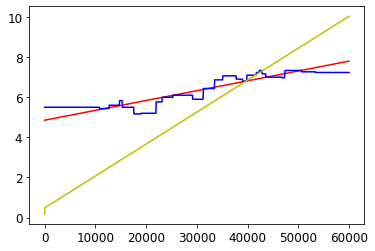

In [ ]:
from sklearn.neural_network import MLPRegressor

# Setup MLPRegressor
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=False)
mlp.fit(Xsample, ysample.ravel())

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M)

plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn3, "b")
plt.plot(m, y_pred_mlp, "y")

print("Predicted lifesatisfaction for Cyprus using MLP: " + str(mlp.predict(Xnew)))
print("Score using MLP " + str(mlp.score(Xsample, ysample)))

#### Questions answered

Sometimes the MLPRregressor produces a garbage regression which is totally useless. However when it has produced a 'decent' regression it is still performing very poorly compared to the linear regressor and the KNN regressor. Comparing the score for the MLP to the linear and KNN-scores, the score is negative, which also indicates that the model is poorly designed to predict the expected lifesatisfaction for a given GDP per capita.

# Exercise 2 - Modules and Packages in Python

## Qa - Load and test the libitmal module
From GITMAL we import libitmal utils

In [ ]:
from libitmal import utils
utils.TestAll()


TestPrintMatrix...(no regression testing)
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
X=[[ 1.  2.]
   ...
   [ 1. -1.]]
X=[[   1.
       2.    ]
   [   3.0001
    -100.    ]
   [   1.
      -1.    ]]
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
OK
TEST: OK
ALL OK


## Qb - Create your own module, with some functions, and test it
Now we create our own library and test module, we place it in our new directory MyMalLib and our test module is named matrixFunctions.py. We can over time collect usefull matrix functions for future use. In powershell we type the following command: setx.exe PYTHONPATH "C:\Users\User"

In [ ]:
from MyMalLib import matrixFunctions

matrix = [[1, 4, 5],
          [-5, 8, 9]]

m = len(matrix) # Height
n = len(matrix[0]) # Width.

matrixFunctions.elementsInMatrix(m, n)

Elements in the matrix: 6


## Qc - How do you 'recompile' a module?

a module in python can be reloaded using the import lib function: .reload(module)
https://docs.python.org/3/library/importlib.html

to reload our module the following code will be executed:

In [ ]:
import importlib
importlib.reload(matrixFunctions)

<module 'MyMalLib.matrixFunctions' from 'C:\\Users\\User\\Libs\\MyMalLib\\matrixFunctions.py'>

To reload all modules we can add two lines of code:

In [ ]:
%load_ext autoreload
%autoreload

## Qe - Extend the class with some public and private functions and member varialbes? 

Here we would like to extend the example class with some public and private functions, including some membervariables. 

In [ ]:
class MyClass:
    myvar = "blah"
    __myvarprivate = "avicii"

    def myfun(self):
        print("This is a message inside the class.")
    
    def __myfunprivate(self):
        print("This is a private function for MyClass.")
        
myobjectx = MyClass()
myobjectx.myfun()
myobjectx.myvar
myobjectx._myfunprivate(self)
myobjectx._myvarprivate             

This is a message inside the class.


AttributeError: 'MyClass' object has no attribute '_myfunprivate'

The above code will throw an error because we a trying to access a private function/variable outside the class.

Practically, python doesn’t have anything called private member variable, but it can be created by adding "__" before a function or variable.

The self parameter of the function means the current instance of the class and is used to access variables that belongs to the class. 
It is important to remember the self parameter otherwis an error occurs like in the example below.

In [ ]:
class MyClass:
    def myfun():
        print("This is a message inside the class.")
    
myobjectx = MyClass()
myobjectx.myfun()

## Qf - Extend the class with a Constructor


We will now try to extend the class with a constructor. 

In [ ]:
class MyClass:
    myvar = "blah"
    __myvarprivate = "avicii"

    def __init__(self, msg1, msg2):
        self.msg1 = msg1
        self.msg2 = msg2
    
    def myfun(self):
        print("This is message 1: ", self.msg1)
        print("This is message 2: ", self.msg2)
    
    def __myfunprivate(self):
        print("This is a private function for MyClass.")
        
myobjectx = MyClass("Hello", "World")
myobjectx.myfun()

An seen in the codesnippet above, a constructor is created using `def __init_(self, parameter1, parameter2, ..,):`\
In python there is no need for a destructor as python has its own garbage collector which can handle the memory management for us. Though if we wish to manually handle the memory, we can create a destructor like this: `def __del__(self)`:

## Qg - Extend the class with a to-string function

We will now try and extend the class with a to-string function. We want to have similar functionality as in C# string serialize, which is builtin standard function. The pythononic way is to use str() method. We make a function called __str__(), which gets called when we print an class object.

In [ ]:
class MyClass:
    def __repr__(self):
        return "Test()"
    def __str__(self):
        return "text that is printed from class object"

myObject = MyClass()
print(myObject)

# Exercise 3 - Cost Function
In the following exercise we will take a deep look into the implementation of the cost function ($J$). We will implement our own $\norm{1]$ and $\norm{2]$, which we will then later use in the implementation of the RMSE and MAE functions. Furthermore we will add some robustness to the implementation, which makes it possible to catch errors as soon as possible.

## Qa - Given the following $\mathbf{x}^{(i)}$'s, construct and print the $\mathbf X$ matrix in python.

$$
    \ar{rl}{
      \bx\pown{1} &= \ac{c}{ 1, 2, 3}^T \\
      \bx\pown{2} &= \ac{c}{ 4, 2, 1}^T \\
      \bx\pown{3} &= \ac{c}{ 3, 8, 5}^T \\
      \bx\pown{4} &= \ac{c}{-9,-1, 0}^T}
$$

In [ ]:
import numpy as np

y = np.array([1,2,3,4]) # NOTE:  you'll need this later
x = np.array([[1,2,3],
              [4,2,1],
              [3,8,5],
              [-9,-1,0]])

print("x = \n" + str(x))


We see that the matrix array is constructed and with the help from numpy, printed visually as a matrix.

## Qb - Implement the $\norm{1}$ and $\norm{2}$ norms for vectors in python.
A norm is a function that takes an vector input and outputs a scalar value which can be interpeted as the 'length', 'size', 'magnitude'. 

We have $\norm{2}$, which is used to calculate the distance of a vector.

$$
    \norm{2}:~~ ||\bx||_2 = \left( \sum_{i=1}^{n} |x_i|^2 \right)^{1/2}\\
$$
$\lVert x \rVert$
We also have $\norm{1}$ which is also called 'City-block' but is not as popular as $\norm{2}$.

$$
    \norm{1}:~~ ||x||_1 = \sum_i |x_i|
$$

We will implement both $\norm{1}$ and $\norm{2}$ as python functions. We create a new python file called vectorFunctions.py in $MyMalLib$.

In [ ]:
from math import fabs

def L1(arr):
    sum = 0
    for x in arr:
        sum += (x**2)**0.5 
    return sum

def L2(arr):
    sum = 0
    for i in arr:
        sum += i**2 #sum^2
    return sum**0.5

def L2Dot(arr):
    return np.dot(arr, arr)**0.5


# TEST vectors: here I test your implementation...calling your L1() and L2() functions
tx=np.array([1, 2, 3, -1])
ty=np.array([3,-1, 4,  1])

expected_d1=8.0
expected_d2=4.242640687119285

d1=L1(tx-ty)
d2=L2(tx-ty)

print(f"tx-ty={tx-ty}, \nd1-expected_d1={d1-expected_d1}, \nd2-expected_d2={d2-expected_d2}")

eps=1E-9
assert fabs(d1-expected_d1)<eps, "L1 dist seems to be wrong" 
assert fabs(d2-expected_d2)<eps, "L2 dist seems to be wrong" 

print("OK(part-1)")


In [ ]:
# comment-in once your L2Dot fun is ready...
d2dot=L2Dot(tx-ty)
print("d2dot-expected_d2=",d2dot-expected_d2)
assert fabs(d2dot-expected_d2)<eps, "L2Ddot dist seem to be wrong" 
print("OK(part-2)")

## Qc - Construct the Root Mean Square Error (RMSE) function

We will now construct the RMSE function ourselfs. Then we will pass our x and y array into the function to calculate the RMSE.\
$$RMSE = \frac{1}{n} ||\by\st{pred} - \by\st{true} ||_2^2$$
Where $\by\st{pred} = L2$, which means we will use our own L2 function to calculate the RMSE

In [ ]:
def RMSE(x, y):
    rmse = ((1/x.shape[0])*(L2(x-y)**2))**0.5
    return rmse

In [ ]:
# Dummy h function:
def h(X):    
    if X.ndim!=2:
        raise ValueError("excpeted X to be of ndim=2, got ndim=",X.ndim)
    if X.shape[0]==0 or X.shape[1]==0:
        raise ValueError("X got zero data along the 0/1 axis, cannot continue")
    return X[:,0]

# Calls your RMSE() function:
r=RMSE(h(x),y)

# TEST vector:
eps=1E-9
expected=6.57647321898295
print(f"RMSE={r}, diff={r-expected}")
assert fabs(r-expected)<eps, "your RMSE dist seems to be wrong" 

print("OK")

## Qd - Similar construct the Mean Absolute Error (MAE) function (Equation 2-2 [HOML]) and evaluate it.

Now we will try ti implement the MAE function. The MAE function is quite similar to the RMSE function. The only difference is to replace L2 with L1, which means that $\by\st{pred} = L1$ and that it is not to the power of 2. $$MAE = \frac{1}{n} ||\by\st{pred} - \by\st{true} ||$$

In [ ]:
def MAE(x,y):
    mae = (((1/x.shape[0])*(L1(x-y)))**2)**0.5
    return mae

# Calls your MAE function:
r=MAE(h(x), y)

# TEST vector:
expected=3.75
print(f"MAE={r}, diff={r-expected}")
assert fabs(r-expected)<eps, "MAE dist seems to be wrong" 

print("OK")

## Qe - Robust Code

We will now add some robustness to our code. This is done by adding some error checking during execution of our functions. `assert` is a good way to do this.

In [ ]:
def L1(arr):
    assert arr.ndim==1, "L1 input must be a vector"
    sum = 0
    for x in arr:
        sum += (x**2)**0.5 
    return sum

def L2(arr):
    assert arr.ndim==1, "L2 input must be a vector"
    sum = 0
    for i in arr:
        sum += i**2 #sum^2
    return sum**0.5


def RMSE(x, y):
    assert x.ndim==1, "The first input of RMSE must be a vector"
    assert y.ndim==1, "The second input of RMSE must be a vector"
    rmse = ((1/x.shape[0])*(L2(x-y)**2))**0.5
    return rmse

# Calls your RMSE() function:
r=RMSE(h(x),y)

# TEST vector:
eps=1E-9
expected=6.57647321898295
print(f"RMSE={r}, diff={r-expected}")
assert fabs(r-expected)<eps, "your RMSE dist seems to be wrong" 

print("OK")

NameError: name 'h' is not defined

In [ ]:
def MAE(x,y):
    assert x.ndim==1, "The first input of MAE must be a vector"
    assert y.ndim==1, "The second input of MAE must be a vector"
    mae = (((1/x.shape[0])*(L1(x-y)))**2)**0.5
    return mae


# Calls your MAE function:
r=MAE(h(x), y)

# TEST vector:
expected=3.75
print(f"MAE={r}, diff={r-expected}")
assert fabs(r-expected)<eps, "MAE dist seems to be wrong" 

print("OK")

## Qf  - Conclusion

By doing the exercises in this chapter, we get a far better understanding of how a loss function works and how it can be implemented. Depending on the dataset you can get different results from your chosen cost function, which means you have to decide which would be the best to use on your actual data. We also got a better understanding of how numpy handles arrays, which is very beneficial for further machine learning concepts. Overall we got more familiar with python and some "good to know" tricks and also how to make robust code by error checking different places in the code.

<a id=’ex_4’></a>
# Exercise 4 - Binary-classifier with fit-predict interface
This exercise introduces the binary classifier, which we use to identify 

## Qa - Load and display the MNIST data

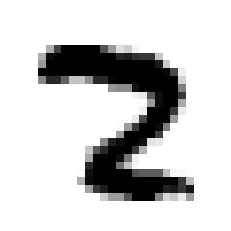

In [ ]:
# TODO: add your code here..
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html#sphx-glr-auto-examples-linear-model-plot-sparse-logistic-regression-mnist-py


#-----------------MNIST-LOADER-FUNCTION------------------
def MNIST_GetDataSet():
    from sklearn.datasets import fetch_openml
    X, y = fetch_openml('mnist_784', return_X_y=True, cache=False, as_frame=False) #load data
    return X / 255. , y 

#matplotlib inline
def MNIST_PlotDigit(data):
    import matplotlib
    import matplotlib.pyplot as plt
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

X, y = MNIST_GetDataSet()

MNIST_PlotDigit(X[28])

In [ ]:

sgd_classifier = SGDClassifier(random_state=69)
#sgd_classifier.fit(X_train, y_train_2)

print(f"Prediction of X[0] = {sgd_classifier.predict([X[0]])}") # Skal returnere array([true]), da X[0] er et 5-tal
print(f"Prediction of X[2] = {sgd_classifier.predict([X[2]])}") # Skal returnere array([false]), da X[2] er et 4-tal

## Qb - Add a Stochastic Gradient Decent [SGD] Classifier

In [ ]:
#train test function
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

y_train_2 = (y_train == '2') # True for all 2s, False for all other digits
y_test_2 = (y_test == '2')

print(y_train_2)
#print(X_train)

print(f"X.shape={X.shape}")
if X.ndim == 3:
    assert y.ndim == 1
    X = X.reshape((X.shape[0], X.shape[1]*X.shape[2]))
assert X.ndim == 2   
print(f"X.shape={X.shape}")


[False  True False ... False  True False]
X.shape=(70000, 784)
X.shape=(70000, 784)


# Exercise 5 - Performance Metrics
Indledning til opgave

| NAME | SYMBOL | ALIAS |
| :---: | :---: | :---: |
|true positives | $TP$ | |
|true negatives | $TN$ | |
|false positives| $FP$ | type I error| 
|false negatives| $FN$ | type II error |

## Qa - Implement the Accuracy function and test it on the MNIST data

We now implement the accuracy function and test it on the data from MNIST, for more details go to [Exercise 4](#ex_4). The Accuracy function is defined as the sum of all true predictions (true positives and true negatives) devided by the total number of samples (positive samples and negative samples). This gives a sense of accuracy of the data.

#### Accuracy
$$
  \ba
      a &= \myfrac{TP + TN}{TP + TN + FP + FN}\\
        &= \myfrac{TP + TN}{N}\\
        &= \myfrac{TP + TN}{N_P~~ + N_N} 
  \ea
$$

In the code we start by implementing MyAccuracy function. By looping over y_true and y_pred, we can compare them. If they are equal at index i then we increment true prediction. In the end we return true predicted divided by total samples of y_true.

In [1]:
from sklearn.metrics import accuracy_score

#Accuracy function
def MyAccuracy(y_true, y_pred):
    true_pred = 0
    for i in y_true.shape[0]:
        if y_true[i] == y_pred[i]: #find all the true predictions (TP+TN)
            true_pred += 1
    return true_pred / y_true.shape[0] #now divide with all samples (N)

y_pred_sgd = stokastiskDegradientDecent_classifier.predict(X_test)
y_pred_dum = dummy_classifier.predict(X_test)

y_true = np.zeros((len(X_test),1),dtype=bool)

#Check all X
for i in range(len(X_test)):
    if y_test[i] == '5':
        y_true[i] = [True]
    else:
        y_true[i] = [False]
        
print(f"accuracy_dum_sklearn = {accuracy_score(y_true, y_pred_dum)}")
print(f"accuracy_sgd_sklearn = {accuracy_score(y_true, y_pred_sgd)}")
print(f"accuracy_dum_my = {MyAccuracy(y_true, y_pred_dum)}")
print(f"accuracy_sgd_my = {MyAccuracy(y_true, y_pred_sgd)}")

NameError: name 'stokastiskDegradientDecent_classifier' is not defined

## Qb - Implement Precision, Recall and $F_1$-score and test it on the MNIST data for both the SGD and Dummy classifier models

We will now implement our own precision, recall and F1-score.

The precision is given by: &emsp; $p = \myfrac{TP}{TP + FP}$

The recall/sensitivity is given by: &emsp; $r = \myfrac{TP}{N_p}$

The F1-score is given by: &emsp; $F_1 = \myfrac{2}{1/p + 1/r}$

In [8]:
from sklearn.metrics import recall_score, precision_score, f1_score

def MyPrecision(y_true, y_pred):
    for i in range(y_true.shape[0]):
        if y_true[i] == [True] and y_pred[i] == [True]:
            trueP += 1
        if y_true[i] == [False] and y_pred[i] == [True]:
            falseP += 1;
    return (trueP/(trueP+falseP))

def MyRecall(y_true, y_pred):
    for i in range(y_true.shape[0]):
        if y_true[i] == [True] and y_pred[i] == [True]:
            trueP += 1
        if y_true[i] == [True] and y_pred[i] == [False]:
            falseN += 1;
    Np = trueP + falseN
    return trueP/Np
    
def MyF1Score(y_true, y_pred):
    return (2/(1/MyPrecision(y_true, y_pred))+(1/MyRecall(y_true, y_pred)))

print(f"precision_dum_sklearn = {precision_score(y_true, y_pred_dum)}")
print(f"precision_sgd_sklearn = {precision_score(y_true, y_pred_sgd)}")
print(f"precision_dum_my = {MyPrecision(y_true, y_pred_dum)}")
print(f"precision_sgd_my = {MyPrecision(y_true, y_pred_sgd)}")

print(f"recall_dum_sklearn = {recall_score(y_true, y_pred_dum)}")
print(f"recall_sgd_sklearn = {recall_score(y_true, y_pred_sgd)}")
print(f"recall_dum_my = {MyRecall(y_true, y_pred_dum)}")
print(f"recall_sgd_my = {MyRecall(y_true, y_pred_sgd)}")

print(f"F1Score_dum_sklearn = {f1_score(y_true, y_pred_dum)}")
print(f"F1Score_sgd_sklearn = {f1_score(y_true, y_pred_sgd)}")
print(f"F1Score_dum_my = {MyF1Score(y_true, y_pred_dum)}")
print(f"F1Score_sgd_my = {MyF1Score(y_true, y_pred_sgd)}")

NameError: name 'y_true' is not defined

## Qc - The Confusion Matrix

## Qd - A Confusion Matrix Heat-map

## Qe - Conclusion